In [43]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
import time
from pandas.io.json import json_normalize

# The plots will be style using the seaborm library.
import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

# Import a new dependency to format the dates
import matplotlib.dates as mdates

In [44]:
# Get data from Alpha Vantage using API request

# Pass the URL and state parameters
url = "https://www.alphavantage.co/query"
params = {
        "function": "TIME_SERIES_DAILY_ADJUSTED",
        "symbol": "CL",
        "outputsize": "full",
        "apikey": "ac9ba10aa04a7d"}


# Get Json response
response = requests.get(url, params=params)
data = response.json()

# Define the data columns we want passed
def df_alpha_response(data,
         columns=['Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']):

    def results_alpha_response(d):
        # convert the response into datetimerecords that can be parsed by Pandas
        for dt, prec in d['Time Series (Daily)'].items():
            r = { 'date': dt}
            r.update(prec)
            yield r
               
    oil_df = pd.DataFrame(results_alpha_response(data))
    # rename the columns    
    oil_df = oil_df.rename(columns={'1. open': 'Open',
                            '2. high': 'High',
                            '3. low': 'Low',
                            '4. close': 'Close',
                            '5. adjusted close': 'AdjClose',
                            '6. volume': 'Volume'})
    oil_df['date'] = pd.to_datetime(oil_df['date'])
    oil_df.set_index('date', inplace=True)
    oil_df.sort_index(inplace=True)
    # extract the default columns
    oil_df = oil_df[columns]
    return oil_df


# Reset index
oil_df = df_alpha_response(data)
oil_df.reset_index(level=0, inplace=True)
oil_df.head()

,date,Open,High,Low,Close,AdjClose,Volume
0,1998-01-02,74.5000,74.5000,72.6900,73.2500,11.9706,451500
1,1998-01-05,74.0000,74.8800,73.2500,74.8800,12.2369,770000
2,1998-01-06,74.9400,74.9400,71.7500,71.9400,11.7565,861600
3,1998-01-07,70.2500,71.6300,69.8800,71.6300,11.7058,1125100
4,1998-01-08,71.6300,71.7500,69.3800,69.7500,11.3986,949700


In [45]:
# Select the date range we want to plot (this one will be for the year 2001)
oil_df1 = oil_df[(oil_df['date'] > '2000-07-01') & (oil_df['date'] < '2000-09-30')]
oil_df2 = oil_df[(oil_df['date'] > '2001-07-01') & (oil_df['date'] < '2001-09-30')]
oil_comb = [oil_df1, oil_df2]
oil_full = pd.concat(oil_comb)
oil_full.head()

,date,Open,High,Low,Close,AdjClose,Volume
630,2000-07-03,59.6300,60.0000,58.6300,59.8800,20.1801,864500
631,2000-07-05,59.0000,59.8100,58.8800,59.3100,19.9880,1610600
632,2000-07-06,59.8800,60.2500,58.7500,58.8100,19.8195,1355900
633,2000-07-07,57.5000,57.9400,56.8800,57.1900,19.2735,2124900
634,2000-07-10,57.2500,57.8800,55.5000,55.6900,18.7680,1475400


In [46]:
# Convert date to datetime64
oil_full['date'] = pd.to_datetime(oil_full['date'])
oil_full.dtypes

date        datetime64[ns]
Open                object
High                object
Low                 object
Close               object
AdjClose            object
Volume              object
dtype: object

In [47]:
# Set the date an index
oil_full = oil_full.set_index('date')
oil_full.head()

,Open,High,Low,Close,AdjClose,Volume
date,,,,,,
2000-07-03,59.6300,60.0000,58.6300,59.8800,20.1801,864500
2000-07-05,59.0000,59.8100,58.8800,59.3100,19.9880,1610600
2000-07-06,59.8800,60.2500,58.7500,58.8100,19.8195,1355900
2000-07-07,57.5000,57.9400,56.8800,57.1900,19.2735,2124900
2000-07-10,57.2500,57.8800,55.5000,55.6900,18.7680,1475400


In [48]:
# Add columns with year, month, and weekday name to the dataframe
oil_full['Year'] = oil_full.index.year
oil_full['Month'] = oil_full.index.month
oil_full['Weekday Name'] = oil_full.index.weekday_name

# Display a random sampling of 5 rows
# oil_full.sample(5, random_state=0)

In [49]:
#For the the column values to be used in the plots, we MUST convert them into numeric values first.
# the date was converted in datatime after creating the dataframe
oil_full.Open=pd.to_numeric(oil_full.Open)
oil_full.High=pd.to_numeric(oil_full.High)
oil_full.Low=pd.to_numeric(oil_full.Low)
oil_full.Close=pd.to_numeric(oil_full.Close)
oil_full.AdjClose=pd.to_numeric(oil_full.AdjClose)
oil_full.Volume=pd.to_numeric(oil_full.Volume)
oil_full.Year=pd.to_numeric(oil_full.Year)
oil_full.Month=pd.to_numeric(oil_full.Month)

In [50]:
oil_full3 = pd.DataFrame(oil_full)
oil_full3.head()

,Open,High,Low,Close,AdjClose,Volume,Year,Month,Weekday Name
date,,,,,,,,,
2000-07-03,59.63,60.00,58.63,59.88,20.1801,864500,2000,7,Monday
2000-07-05,59.00,59.81,58.88,59.31,19.9880,1610600,2000,7,Wednesday
2000-07-06,59.88,60.25,58.75,58.81,19.8195,1355900,2000,7,Thursday
2000-07-07,57.50,57.94,56.88,57.19,19.2735,2124900,2000,7,Friday
2000-07-10,57.25,57.88,55.50,55.69,18.7680,1475400,2000,7,Monday


In [51]:
pd.pivot_table(oil_full3, index= 'Year', values= "Close")

,Close
Year,
2000,52.717460
2001,55.467458


In [52]:
pd.pivot_table(oil_full3, index = 'Month', values="AdjClose")

,AdjClose
Month,
7,19.004202
8,18.318246
9,17.664240


In [53]:
pd.pivot_table(oil_full3, index = ['Year','Month'], values="Close")

Close
Year Month           
2000 7      55.907500
     8      53.336087
     9      48.816000
2001 7      56.105714
     8      54.412609
     9      56.191333

In [58]:
pd.pivot_table(oil_full3, index= 'Month', columns='Year', values="Close")

Year,2000,2001
Month,,
7,55.907500,56.105714
8,53.336087,54.412609
9,48.816000,56.191333


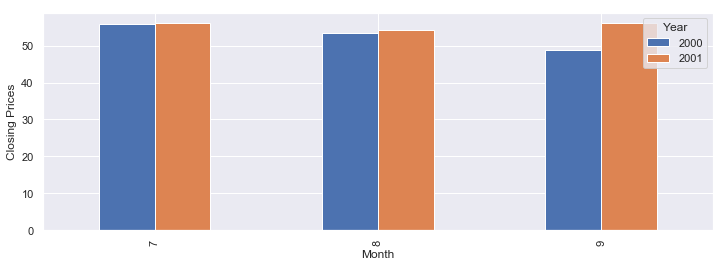

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# use Seaborn styles
sns.set()  

pd.pivot_table(oil_full3, index= 'Month', columns='Year', values="Close").plot(kind= 'bar', figsize=(12, 4))
plt.ylabel("Closing Prices")

ax.set_title('Line Plot - Weekly Crude Oil Stocks from 07/2001 - 09/2001')

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

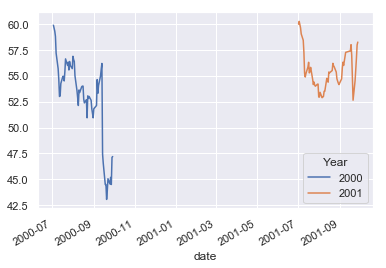

In [30]:
import numpy as np
import pandas as pd
# oil_full = oil_full.pivot(index='date', columns='Year', values='Close').fillna(0)

start = pd.to_datetime('2000')

end = pd.to_datetime('2001')

plt = oil_full.pivot(values='Close', columns='Year').plot()

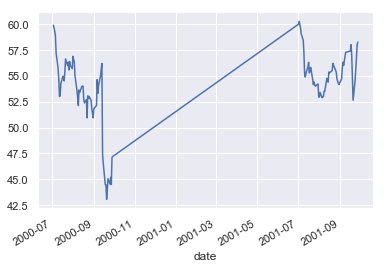

In [31]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
oil_full['Close'].plot(grid=True)

# Show the plot
plt.show()

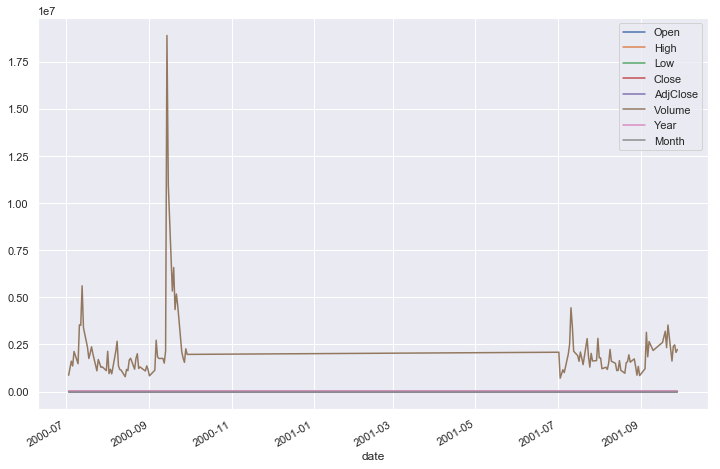

In [32]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
oil_full.plot(figsize=(12,8))

# Show the plot
plt.show()

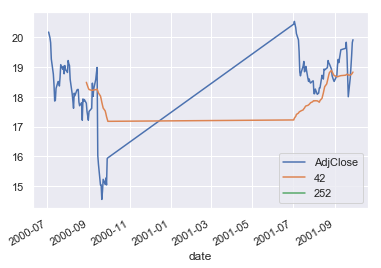

In [33]:
# Import matplotlib 
import matplotlib.pyplot as plt

# Short moving window rolling mean
oil_full['42'] = oil_full['AdjClose'].rolling(window=40).mean()

# Long moving window rolling mean
oil_full['252'] = oil_full['AdjClose'].rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
oil_full[['AdjClose', '42', '252']].plot()

# Show plot
plt.show()

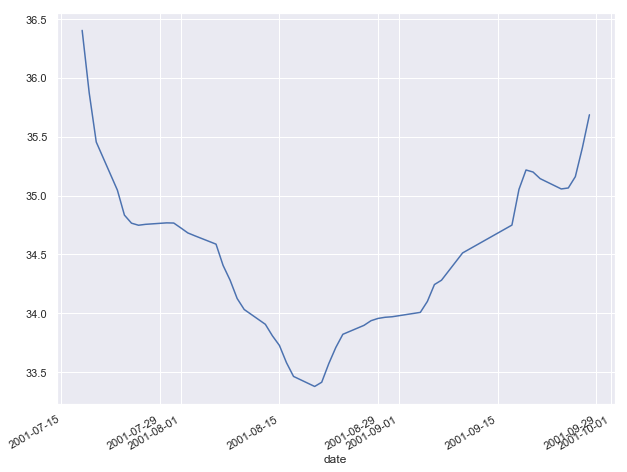

In [34]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = oil_full['Close'].rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [35]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=oil_full.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = oil_full['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = oil_full['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

            signal  short_mavg  long_mavg  positions
date                                                
2000-07-03     0.0   59.880000  59.880000        NaN
2000-07-05     0.0   59.595000  59.595000        0.0
2000-07-06     0.0   59.333333  59.333333        0.0
2000-07-07     0.0   58.797500  58.797500        0.0
2000-07-10     0.0   58.176000  58.176000        0.0
2000-07-11     0.0   57.585000  57.585000        0.0
2000-07-12     0.0   56.930000  56.930000        0.0
2000-07-13     0.0   56.446250  56.446250        0.0
2000-07-14     0.0   56.202222  56.202222        0.0
2000-07-17     0.0   56.076000  56.076000        0.0
2000-07-18     0.0   55.972727  55.972727        0.0
2000-07-19     0.0   55.850000  55.850000        0.0
2000-07-20     0.0   55.813846  55.813846        0.0
2000-07-21     0.0   55.872143  55.872143        0.0
2000-07-24     0.0   55.880667  55.880667        0.0
2000-07-25     0.0   55.907500  55.907500        0.0
2000-07-26     0.0   55.887059  55.887059     

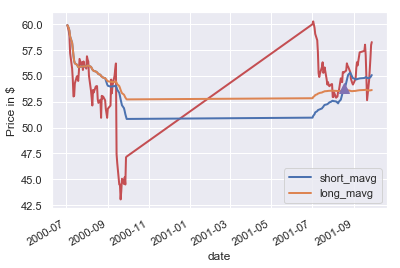

In [36]:
# Import `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
oil_full['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [37]:
start = pd.to_datetime('2000, 7, 1')

end = pd.to_datetime('2001, 9, 30')

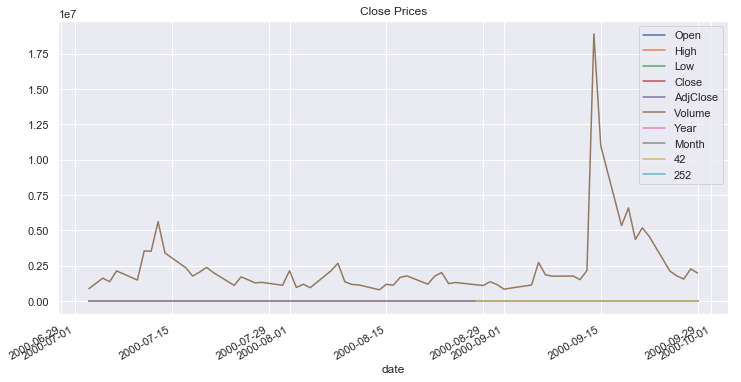

In [38]:
oil_full['2000'].plot(label="Close", figsize=(12,6), title="Close Prices")
plt.legend();

ValueError: Length of values does not match length of index

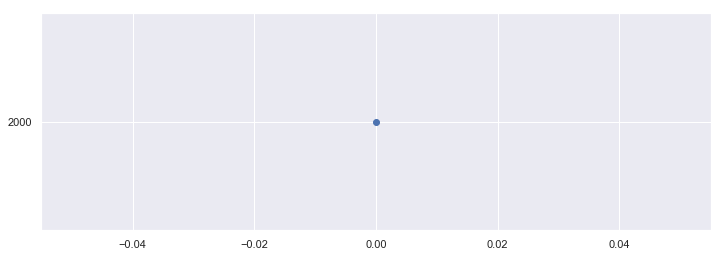

In [39]:
fig, ax = plt.subplots(figsize=(12, 4))

oil_df['CLose'] = ax.plot(['2000'], marker='o', linestyle='-')
ax.set_ylabel('Crude Oil - Closing Prices ($)')
ax.set_title('Line Plot - Weekly Crude Oil Stocks from 07/2001 - 09/2001')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

## Weekly Line Plot - Crude Oil Stocks Comparison 07/00 - 09/00 & 07/01 - 09/01 

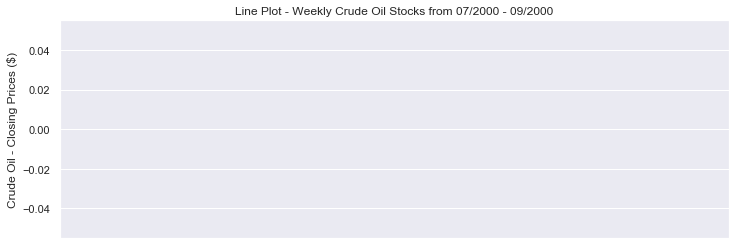

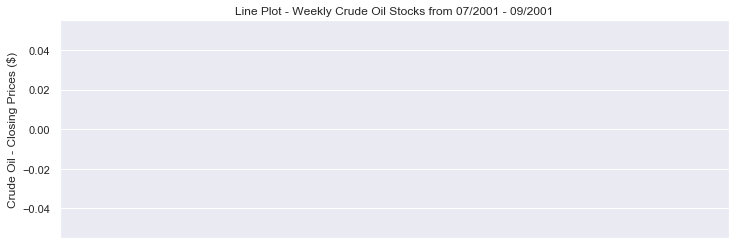

In [40]:
# Visually display side by side the two line plots

#Using the dataframes generated above we'll create a weekly line plot
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(oil_df.loc['2000-07-01':'2000-09-30', 'Close'], marker='o', linestyle='-')
ax.set_ylabel('Crude Oil - Closing Prices ($)')
ax.set_title('Line Plot - Weekly Crude Oil Stocks from 07/2000 - 09/2000')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

#-----------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(oil_df.loc['2001-07-01':'2001-09-30', 'Close'], marker='o', linestyle='-')
ax.set_ylabel('Crude Oil - Closing Prices ($)')
ax.set_title('Line Plot - Weekly Crude Oil Stocks from 07/2001 - 09/2001')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

The line plot for the year 2000 illustrates stability in crude oil stocks, however, there is a sharp decline in mid September. While the 2001 plot, when compared to the prior year, appears less stable.

-----------------------------------------------------------------------------------

## Plot with Resampling and Rolling Mean

We will resample the data to a weekly mean time series

In [41]:
# Specify the data columns we want to include
data_columns = ['Open', 'Close', 'AdjClose', 'Volume']

# Resample to weekly frequency, aggregating with mean
oil_df_weekly_mean = oil_df[data_columns].resample('W').mean()
oil_df_weekly_mean.head()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
print(oil_df.shape[0])
print(oil_df_weekly_mean.shape[0])

#### Line Plot with Frequency and Resampling Functions - Crude Oil 07/2001 - 09/2001

In [ ]:
# Start and end of the date range to extract
start, end = '2000-07', '2000-09'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(oil_df.loc[start:end, 'Close'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily Mean')

ax.plot(oil_df_weekly_mean.loc[start:end, 'Close'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.set_ylabel('2000 Crude Oil - Closing Prices')
ax.set_title('Crude Oil Stock Prices from 07/00 - 09/00')
ax.legend();

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
# Rotate the labels at 90 angle when overlapping occur
plt.xticks(rotation=90)
plt.show()

#--------------------------------------------------------------------------------

# Start and end of the date range to extract
start, end = '2001-07', '2001-09'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(oil_df.loc[start:end, 'Close'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily Mean')

ax.plot(oil_df_weekly_mean.loc[start:end, 'Close'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.set_ylabel('2001 Crude Oil - Closing Prices')
ax.set_title('Crude Oil Stock Prices from 07/01 - 09/01')
ax.legend();

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
# Rotate the labels at 90 angle when overlapping occur
plt.xticks(rotation=90)
plt.show()

The weekly mean is smoother that the daily mean because of higher date frequency.

---------------------------------------------------------------------------------

#### Line Plot with Frequency, Resampling and Rolling Mean Functions - Crude Oil 07/2001 - 09/2001

In [ ]:
# Create a new dataframe centered on the 7-day rolling mean
oil_df_7day = oil_df[data_columns].rolling(7, center=True).mean()
oil_df_7day.head(10)

In [ ]:
# Start and end of the date range to extract
start, end = '2000-07', '2000-09'

# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(oil_df.loc[start:end, 'Close'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily Mean')

ax.plot(oil_df_weekly_mean.loc[start:end, 'Close'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.plot(oil_df_7day.loc[start:end, 'Close'],
        marker='.', linestyle='-', label='7 Day Rolling Mean')

ax.set_ylabel('2000 Crude Oil - Closing Prices')
ax.set_title('Crude Oil Stock Prices from 07/00 - 09/00')
ax.legend();

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
# Rotate the labels at 90 angle when overlapping occur
plt.xticks(rotation=90)
plt.show()
#-------------------------------------------------------------------------------

# Start and end of the date range to extract
start, end = '2001-07', '2001-09'

# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(oil_df.loc[start:end, 'Close'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily Mean')

ax.plot(oil_df_weekly_mean.loc[start:end, 'Close'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.plot(oil_df_7day.loc[start:end, 'Close'],
        marker='.', linestyle='-', label='7 Day Rolling Mean')

ax.set_ylabel('2001 Crude Oil - Closing Prices')
ax.set_title('Crude Oil Stock Prices from 07/01 - 09/01')
ax.legend();

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
# Rotate the labels at 90 angle when overlapping occur
plt.xticks(rotation=90)
plt.show()

The trend line reveals that oil prices reached a sharp decline in the months prior to 9-11. And it remained flat for several years after.

--------------------------------------------------------------------------------

#### Rolling Means Trends plot - Crude Oil 07/2001 - 09/2001

In [ ]:
# The min_periods=360 argument accounts for a few isolated missing days in the
# Open and AdjClose Prices time series

oil_df_365d = oil_df[data_columns].rolling(window=365, center=True, min_periods=360).mean()

In [ ]:
# Start and end of the date range to extract
start, end = '2000', '2019'

# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(oil_df.loc[start:end, 'Close'], marker='.', markersize=2, color='0.6',
        linestyle='None', label='Daily Mean')

ax.plot(oil_df_7day.loc[start:end, 'Close'], linewidth=2, label='7 Day Rolling Mean')

ax.plot(oil_df_365d.loc[start:end, 'Close'], color='0.2', linewidth=3,
        label='Trend (365 Day Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Oil Stocks Over the Years ')
ax.set_ylabel('Oil Stock Prices ($)')
ax.set_title('Price Trend for Crude Oil from 2000 to 2019')
# Rotate the labels at 90 angle when overlapping occur
plt.xticks(rotation=90)
plt.show();

The trend line reveals that oil prices were on a steady climb from 2000 through 2013, with several ups and downs in between. But the sharp decline of 2013 has remained flat since.